In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.compose import make_column_transformer

In [114]:
data = pd.read_csv('data.csv')

In [115]:
# Data processing
data = data.iloc[:, 1:] # removes first column with id's
X_raw = data.iloc[:,:-1] # creates feature matrix without churn

In [116]:
# Use this command to do a value count of selected columns
#X_raw['PhoneService'].value_counts()

In [117]:
# One hot encoding
encoder = OneHotEncoder(sparse = False)
column_trans = make_column_transformer((encoder, ['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']), remainder = 'passthrough')

#encoder.fit_transform(X_raw[['PaymentMethod']])
#encoder.categories_
# NEW feature matrix
X = column_trans.fit_transform(X_raw)

In [118]:
#encoder.categories_


In [119]:
# Binary encode churn
target = data.iloc[:,-1:]
y = target.apply(LabelEncoder().fit_transform)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [121]:
# Hyperprameter tuning
params = {'max_depth' : list(range(1,11)),
'min_samples_leaf': list(range(40,71))}
gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=2), params,verbose=1, cv=5, n_jobs=-1)
#gridsearch = DecisionTreeClassifier(random_state=2)


In [122]:
# Fit model
clf = gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 310 candidates, totalling 1550 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1380 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 1550 out of 1550 | elapsed:    7.3s finished


In [123]:
clf.best_params_

{'max_depth': 7, 'min_samples_leaf': 50}

In [124]:
# Check overfitting by predicting the training set. Single iteration.
predict_train = clf.predict(X_train) # predict for training set
acc = accuracy_score(y_train, predict_train)
pre = precision_score(y_train, predict_train)
rec = recall_score(y_train, predict_train)
print('TRAIN SET SINGLE prediction scores:\nAccuracy score =', acc)
print('Precision score =', pre)
print('Recall score =', rec)

TRAIN SET SINGLE prediction scores:
Accuracy score = 0.8748476229175132
Precision score = 0.7822111388196176
Recall score = 0.7266409266409266


In [125]:
# Scores for single iteration of test data
predict = clf.predict(X_test) 
acc = accuracy_score(y_test, predict)
pre = precision_score(y_test, predict)
rec = recall_score(y_test, predict)
print('TEST SET SINGLE:\nAccuracy score =', acc)
print('Precision score =', pre)
print('Recall score =', rec)

TEST SET SINGLE:
Accuracy score = 0.8450236966824645
Precision score = 0.7257769652650823
Recall score = 0.6916376306620209


In [126]:
# 10 fold Cross validation predict scores on hold out dataset 
a = clf.best_estimator_

y_predict = cross_val_predict(a, X_test,y_test, cv =10)
acc = accuracy_score(y_test, y_predict)
pre = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
print('TEST SET 10 FOLD CV (hold out data set)\nAccuracy score =', acc)
print('Precision score =', pre)
print('Recall score =', rec)

TEST SET 10 FOLD CV (hold out data set)
Accuracy score = 0.8364928909952607
Precision score = 0.7390396659707724
Recall score = 0.6167247386759582


In [127]:
scores = cross_val_score(a, X_test, y_test, cv=10, scoring = 'recall')
scores

array([0.61403509, 0.68421053, 0.57894737, 0.63157895, 0.59649123,
       0.64912281, 0.56896552, 0.70689655, 0.51724138, 0.62068966])

In [128]:
#matrix = confusion_matrix(y_test, predict)
# Plot confusion Matrix
class_names = ['Churn_No', 'Churn_Yes']
dataframe_Confusion =  pd.DataFrame(matrix, index=class_names, columns=class_names) 

sns.heatmap(dataframe_Confusion, annot=True,  cmap="Blues", fmt=".0f")
plt.title("Confusion Matrix - DT - Max_depth = 5")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.savefig('./confusion_matrix.png')
plt.show()
plt.close()

NameError: name 'matrix' is not defined

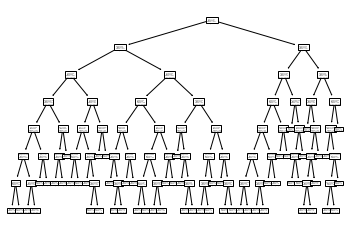

In [129]:
plot_tree(clf.best_estimator_)
plt.show()

In [130]:
classification_report(y_test,predict)

'              precision    recall  f1-score   support\n\n           0       0.89      0.90      0.89      1536\n           1       0.73      0.69      0.71       574\n\n    accuracy                           0.85      2110\n   macro avg       0.81      0.80      0.80      2110\nweighted avg       0.84      0.85      0.84      2110\n'